In [46]:
import pandas as pnd
import numpy as npy
import matplotlib.pyplot as plt

In [47]:
#loading the data
dta = data
dta = pd.read_csv("diabetes1_2.csv")

In [48]:
#printing the data 
print(dta)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [49]:
#set seed
np.random.seed(768)

In [50]:
#take the random samples of 25 observations
smp = sample
smp = data.sample(25)
#printing the samples 
print(smp)
#calculating the mean and max glucose of given samples
mn_smp_glucose = smp['Glucose'].mean()
max_smp_glucose = smp['Glucose'].max()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
744           13      153             88             37      140  40.6   
308            0      128             68             19      180  30.5   
338            9      152             78             34      171  34.2   
326            1      122             64             32      156  35.1   
750            4      136             70              0        0  31.2   
354            3       90             78              0        0  42.7   
714            3      102             74              0        0  29.5   
761            9      170             74             31        0  44.0   
672           10       68            106             23       49  35.5   
610            3      106             54             21      158  30.9   
591            2      112             78             50      140  39.4   
412            1      143             84             23      310  42.4   
4              0      137             

In [51]:
#calculating the mean and max glucose of the population
mn_pop_glucose = dta['Glucose'].mean()
max_pop_glucose = dta['Glucose'].max()

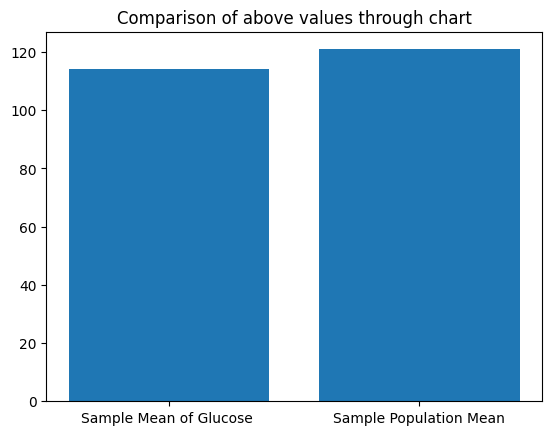

In [58]:
#plot the results
fig, ax = plt.subplots()
ax.bar(['Sample Mean of Glucose ', 'Sample Population Mean'], [mean_sample_glucose, mean_pop_glucose])
ax.set_title('Comparison of above values through chart')
plt.show()

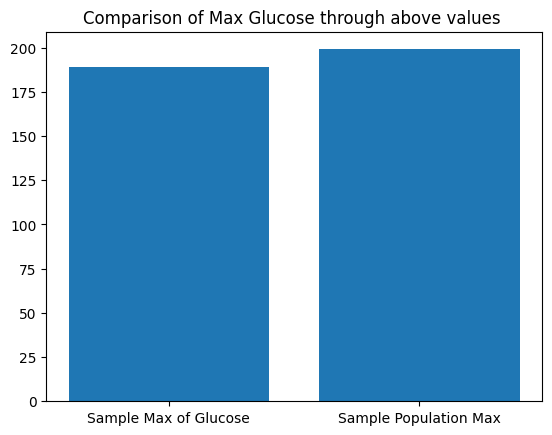

In [60]:
fig, ax = plt.subplots()
ax.bar(['Sample Max of Glucose', 'Sample Population Max'], [max_sample_glucose, max_pop_glucose])
ax.set_title('Comparison of Max Glucose through above values ')
plt.show()

In [61]:
#calculating the 98th percentile of BMI for sample and population
percentile_sample_bmi = np.percentile(sample['BMI'], 98)
percentile_pop_bmi = np.percentile(dta['BMI'], 98)

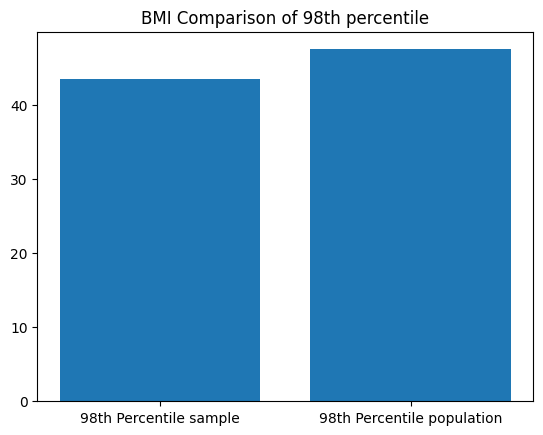

In [63]:
#plotting the results
fig, ax = plt.subplots()
ax.bar(['98th Percentile sample', '98th Percentile population'], [percentile_sample_bmi, percentile_pop_bmi])
ax.set_title('BMI Comparison of 98th percentile') 
plt.show()

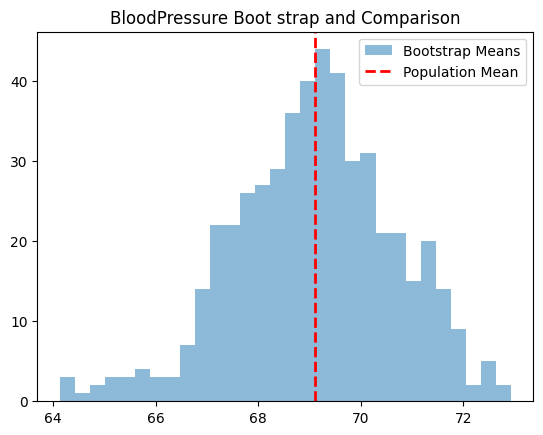

In [86]:
# set number of bootstrap samples = 500 and sample size = 150
n_samples = 500
sample_size = 150

# For storing bootstrap sample statistics create a list
btstr_stats = []

#creating the bootstrap samples and calculate the statistics
for i in range(n_samples):
    btstr_sample = data.sample(sample_size, replace=True)
    btstr_mean = btstr_sample['BloodPressure'].mean()
    btstr_std = btstr_sample['BloodPressure'].std()
    btstr_percentile = np.percentile(btstr_sample['BloodPressure'], 25)
    btstr_stats.append((btstr_mean, btstr_std, btstr_percentile))

# calculating population statistics
pop_mean = data['BloodPressure'].mean()
pop_std = data['BloodPressure'].std()
pop_percentile = np.percentile(data['BloodPressure'], 25)

# unzipping the bootstrap sample statistics
btstr_means, btstr_stds, btstr_percentiles = zip(*btstr_stats)

# plotting the results
fig, ax = plt.subplots()
ax.hist(btstr_means, bins=30, alpha=0.5, label='Bootstrap Means')
ax.axvline(pop_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
ax.legend()
ax.set_title('BloodPressure Boot strap and Comparison')
plt.show()
